In [101]:
import Network
import Learning
import matplotlib.pyplot as plt
import numpy as np

In [102]:
def linearTestData(n):
    x = np.arange(0,n) 
    y = np.arange(0,n) + np.random.normal(size=n)
    x = [[i] for i in x]
    y = [[i] for i in y]
    return x,y

def quadraticTestData(n):
    x = np.arange(0,n) 
    y = np.arange(0,n)**2
    x = [[i] for i in x]
    y = [[i] for i in y]
    return x,y

def sinTestData(n):
    x = np.arange(0,n) 
    y = np.sin(2*np.pi*x/(n))
    x = [[i] for i in x]
    y = [[i] for i in y]
    return x,y

def MSELoss(y,ypred):
    return np.sum((y-ypred)**2)

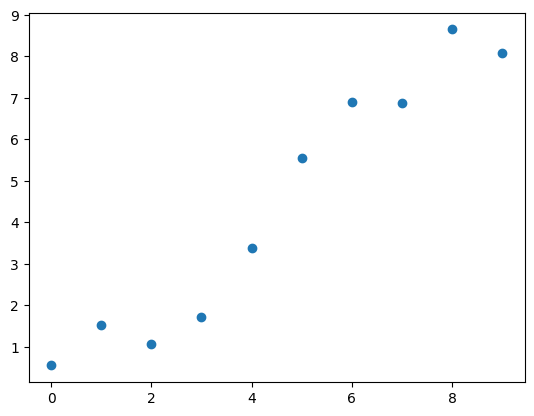

In [103]:
x,y = linearTestData(10)
plt.plot(x,y,'o')

In [104]:
x,y = linearTestData(100)
net = Network.network(1,1)
net.add_layer(Network.layer_dense(1,2))
net.add_layer(Network.relu())
net.add_layer(Network.layer_dense(2,1))
net.add_layer(Network.relu())

print('Init Loss',MSELoss(y,net.forward(x)))
LossFunction = lambda net: MSELoss(y,net.forward(x))

losses = Learning.random_learning(net,LossFunction,100,100,0.1,0.001)
print('Final Loss',losses[-1])

Init Loss 327778.32201299374
Final Loss 95.75260897606562


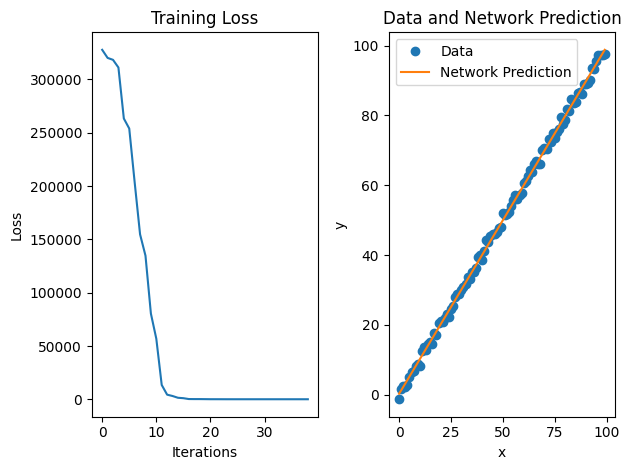

In [105]:
#plots
plt.subplot(1, 2,1)
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')

# Plot 2
plt.subplot(1, 2, 2)
plt.plot(x, y, 'o', label='Data')
plt.plot(x, net.forward(x), label='Network Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Network Prediction')
plt.legend()

plt.tight_layout()
plt.show()

In [106]:
x,y = quadraticTestData(10)
net = Network.network(1,1)
net.add_layer(Network.layer_dense(1,10))
net.add_layer(Network.relu())
net.add_layer(Network.layer_dense(10,10))
net.add_layer(Network.relu())
net.add_layer(Network.layer_dense(10,1))
net.add_layer(Network.relu())

print('Init Loss',MSELoss(y,net.forward(x)))
LossFunction = lambda net: MSELoss(y,net.forward(x))

losses = Learning.random_learning(net,LossFunction,100,1000,0.1,0.001)
print('Final Loss',losses[-1])

Init Loss 15333.0
Final Loss 6.574367211186173


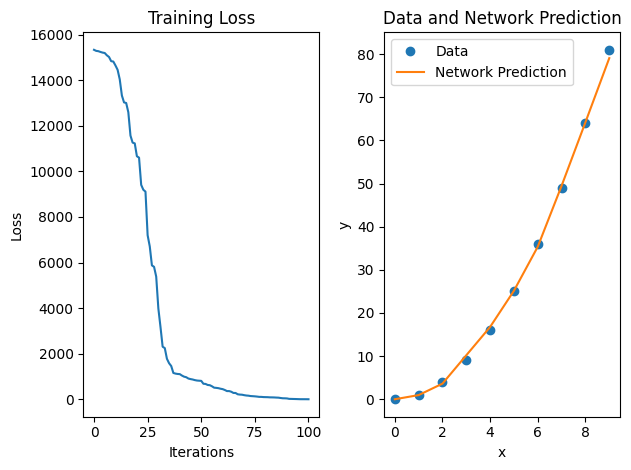

In [107]:
#plots
plt.subplot(1, 2,1)
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')

# Plot 2
plt.subplot(1, 2, 2)
plt.plot(x, y, 'o', label='Data')
plt.plot(x, net.forward(x), label='Network Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Network Prediction')
plt.legend()

plt.tight_layout()
plt.show()

In [108]:
x,y = sinTestData(50)
net = Network.network(1,1)
net.add_layer(Network.layer_dense(1,10))
net.add_layer(Network.relu())
net.add_layer(Network.layer_dense(10,10))
net.add_layer(Network.relu())
net.add_layer(Network.layer_dense(10,1))

print('Init Loss',MSELoss(y,net.forward(x)))
LossFunction = lambda net: MSELoss(y,net.forward(x))

losses = Learning.random_learning(net,LossFunction,100,1000,1/8,1/2**5)
print('Final Loss',losses[-1])

Init Loss 25.000000000000007
Final Loss 1.8264746711930027


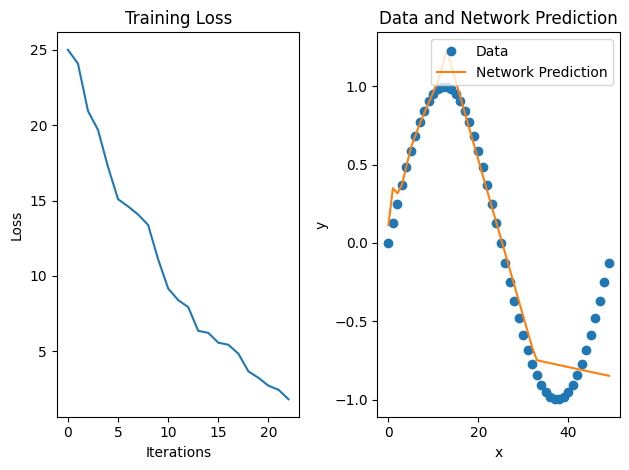

In [109]:
#plots
plt.subplot(1, 2,1)
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')

# Plot 2
plt.subplot(1, 2, 2)
plt.plot(x, y, 'o', label='Data')
plt.plot(x, net.forward(x), label='Network Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Network Prediction')
plt.legend()

plt.tight_layout()
plt.show()

In [110]:
import cProfile
x,y = sinTestData(20)
net = Network.network(1,1)
net.add_layer(Network.layer_dense(1,10))
net.add_layer(Network.relu())
net.add_layer(Network.layer_dense(10,10))
net.add_layer(Network.relu())
net.add_layer(Network.layer_dense(10,1))
net.add_layer(Network.relu())

cProfile.run('Learning.random_learning(net,LossFunction,100,1000,0.1,0.001)',sort='tottime')

         36204065 function calls (35967437 primitive calls) in 42.097 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   236628   10.363    0.000   31.483    0.000 shape_base.py:267(apply_along_axis)
  4732560    7.734    0.000    7.734    0.000 Network.py:91(<lambda>)
  4969188    2.620    0.000    5.830    0.000 shape_base.py:370(<genexpr>)
   236628    2.549    0.000    2.606    0.000 Network.py:67(forward)
  4969188    2.300    0.000    3.211    0.000 index_tricks.py:690(__next__)
    78875    1.966    0.000    3.431    0.000 Learning.py:25(random_mutate)
   236628    1.699    0.000    2.514    0.000 stride_tricks.py:38(as_strided)
   236628    1.265    0.000    5.206    0.000 index_tricks.py:663(__init__)
   473250    1.204    0.000    1.204    0.000 {method 'normal' of 'numpy.random.mtrand.RandomState' objects}
5205816/4969188    1.026    0.000    1.352    0.000 {built-in method builtins.next}
   315504    1.002    0.